In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [3]:
function count_floats(a, b)
    count = 0
    if a > b
        a, b = b, a
    end
    while a < b
        a = nextfloat(a)
        count += 1
    end
    return count
end

count_floats (generic function with 1 method)

In [4]:
t = 500.0; tt = 200.0; tstep = 0.001
trange = range(0.0, t, step = tstep);

In [5]:
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [6]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58;  const U0 = 0.3;  const ΔU0 = 0.305;

In [21]:
I0 = -1.8
p =  [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [8.39353, 0.73803, 0.429055];

In [22]:
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [8.39353, 0.73803, 0.429055]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.8]

In [23]:
I0range = range( -1.8, -1.87036, length = 501 )

idx_control_parameter = 11

idx_fix = 1; fixed_value = 10
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-13, atol = 1e-13);

In [24]:
I0range

-1.8:-0.00014072:-1.87036

In [25]:
count_floats(Float32(I0range[1]), Float32(I0range[end]))

590223

In [ ]:
idx_save = 2
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.8
parameter = -1.80014072
parameter = -1.80028144
parameter = -1.80042216
parameter = -1.80056288
parameter = -1.8007036
parameter = -1.80084432
parameter = -1.80098504
parameter = -1.80112576
parameter = -1.80126648
parameter = -1.8014072

In [ ]:
# Сечение Пуанкаре E = 10
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25, xgridvisible = false, ygridvisible = false)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("black", 0.5), markersize = 1.5)
end
f

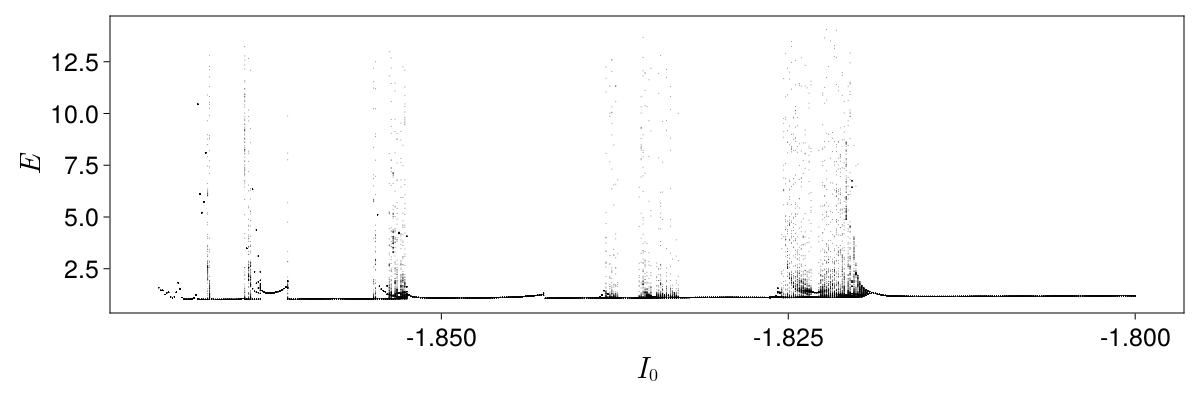

In [20]:
# Сечение Пуанкаре E = 0.46
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25, xgridvisible = false, ygridvisible = false)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("black", 0.5), markersize = 1.5)
end
f